# Gene Expression

Python provides us with a really handy means to analyze our data. In this exercise, we are going to identify genes that were not expressed in a microarray experiment. We'll read gene expression values from a matrix. We'll be finding these genes by plotting with a python library called [matplotlib](http://matplotlib.org/).

Populating the interactive namespace from numpy and matplotlib


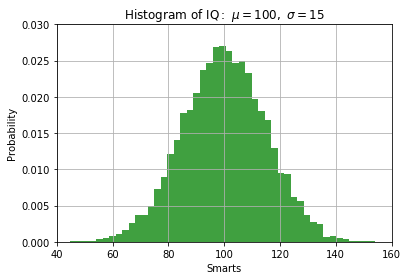

In [1]:
# Magic line (Command specific to iPython Notebooks)
# that makes plots show up in the notebook
%pylab inline

# Import numpy to generate random numbers
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

We can also read values from a file that is included in the assignment directory. For example, let's read a file and plot the distribution of gene expression values for the first gene in the file.

Populating the interactive namespace from numpy and matplotlib


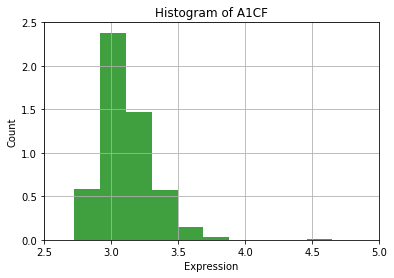

In [2]:
%pylab inline
import matplotlib.pyplot as plt

tcga_mini = open("tcga_ovca_mini.txt") #tell python that we're going to want to read a file
#tcga_mini is now something called a "filehandle" and we can read lines from the file

header = tcga_mini.readline().strip().split('\t') #read the first line, remove whitespace, separate by tabs
#we don't need this header for this problem, because it contains a list of sample labels

#get the gene expression list for the first gene
first_gene_list = tcga_mini.readline().strip().split('\t')

#get the gene's name and remove it from the list
gene_name = first_gene_list.pop(0)

#make a list for expression values
expression_values = []

#go through all of the remaining items, make them floats, and put them onto expression_values
for expr_val in first_gene_list:
    expression_values.append(float(expr_val))

#use the plotting code above, but modify it to use expression_values
n, bins, patches = plt.hist(expression_values, 10, density=1, facecolor='green', alpha=0.75)

plt.xlabel('Expression')
plt.ylabel('Count')
plt.title('Histogram of ' + gene_name)
plt.axis([2.5, 5, 0, 2.5])
plt.grid(True)

plt.show()

When we're working with large files, it can help to work with a small test file. The file tcga_ovca_mini.txt has only the first five lines of the full file (tcga_ovca.txt).

We're interested in identifying genes that look like background hybridization values on the array and not expressed. When we look at gene expression arrays, we can often observe this in a bimodal distribution of values, with one narrow peak at the low end of the distribution, and then one higher and broader peak. Some genes may be expressed in some samples but not others, which makes the mean a poor measure. Instead we can use the extreme of each gene's distribution across samples, for example the 95th percentile.

    # Hint 1:
    int(.95*len(expression_values))
    # might be helpful.
    
    # Hint 2:
    for line in filehandle:
        #will iterate through each line of the file from the current location onward.

**Problem Set Problem 1.1 -- 8 Points**
Write the python code required to graph, for tcga_ovca_mini.txt, the distribution of the 95th percentile using a matplotlib histogram.

In [6]:
# FILL IN CODE
tcga_mini = open("tcga_ovca_mini.txt")
length = len(tcga_mini.readlines())
dist = []
for i in range(1,length):
    tcga_mini = open("tcga_ovca_mini.txt")
    gene_list = tcga_mini.readlines()[i].strip().split('\t')
    gene_list.pop(0)
    expression_values = []
    for expr_val in gene_list:
        expression_values.append(float(expr_val))
    
    loc = int(.95*len(expression_values))
    dist.append(expression_values[loc])
    
print(dist)

[3.08584020276059, 8.38595161334597, 3.35823006774768, 3.201299171795]


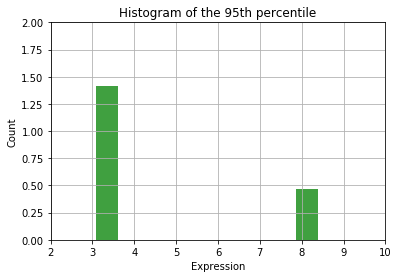

In [7]:
# plot
n, bins, patches = plt.hist(dist, 10, density=1, facecolor='green', alpha=0.75)

plt.xlabel('Expression')
plt.ylabel('Count')
plt.title('Histogram of the 95th percentile')
plt.axis([2, 10, 0, 2])
plt.grid(True)

plt.show()

**Problem Set Problem 1.2 -- 1 Point**
Write code that graphs, for tcga_ovca.txt, the distribution of the 95th percentile. This will be extremely similar to the code above, but you may find that you need to change your implementation to work for the complete file if it is not computationally efficient.

In [8]:
# FILL IN CODE
tcga = open("tcga_ovca.txt")
length = len(tcga.readlines())
dist = []
for i in range(1,length):
    tcga = open("tcga_ovca.txt")
    gene_list = tcga.readlines()[i].strip().split('\t')
    gene_list.pop(0)
    expression_values = []
    for expr_val in gene_list:
        expression_values.append(float(expr_val))
    
    loc = int(.95*len(expression_values))
    dist.append(expression_values[loc])


In [9]:
len(dist)

12981

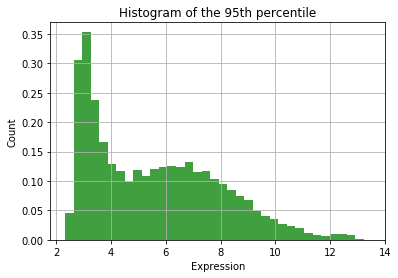

In [17]:
# plot
n, bins, patches = plt.hist(dist, 35, density=1, facecolor='green', alpha=0.75)

plt.xlabel('Expression')
plt.ylabel('Count')
plt.title('Histogram of the 95th percentile')
plt.axis([1.8, 14, 0, 0.37])
plt.grid(True)

plt.show()

**Problem Set Problem 1.3 -- 1 Point**
What would be a good cutpoint to say that a gene is actually expressed in these data?

We would like to choose a cut point where the bimodal distribution can be well separated. From the above plot we can see that a good cut point to split the higher peak on the left and the lower peak on the right right would be around 4.7.

In [ ]:
# ASSIGNMENT ENDS